In [1]:

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

In [2]:
import os


import numpy as np
from scipy.stats import norm

from matplotlib import pyplot
np.random.seed(3)

num_per_class = 40
#生成样本
X = np.hstack((norm.rvs(2, size=num_per_class, scale=2),
              norm.rvs(8, size=num_per_class, scale=3)))
y = np.hstack((np.zeros(num_per_class),
               np.ones(num_per_class)))


def lr_model(clf, X):
    return 1.0 / (1.0 + np.exp(-(clf.intercept_ + clf.coef_ * X)))

from sklearn.linear_model import LogisticRegression
logclf = LogisticRegression()
print(logclf)
logclf.fit(X.reshape(num_per_class * 2, 1), y)
print(np.exp(logclf.intercept_), np.exp(logclf.coef_.ravel()))
print("P(x=-1)=%.2f\tP(x=7)=%.2f" %
      (lr_model(logclf, -1), lr_model(logclf, 7)))
X_test = np.arange(-5, 20, 0.1)
pyplot.figure(figsize=(10, 4))
pyplot.xlim((-5, 20))
pyplot.scatter(X, y, c=y)
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.grid(True, linestyle='-', color='0.75')

def lin_model(clf, X):
    return clf.intercept_ + clf.coef_ * X

from sklearn.linear_model import LinearRegression
clf = LinearRegression()
print(clf)
clf.fit(X.reshape(num_per_class * 2, 1), y)
X_odds = np.arange(0, 1, 0.001)
pyplot.figure(figsize=(10, 4))
pyplot.subplot(1, 2, 1)
pyplot.scatter(X, y, c=y)
pyplot.plot(X_test, lin_model(clf, X_test))
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.title("linear fit on original data")
pyplot.grid(True, linestyle='-', color='0.75')

X_ext = np.hstack((X, norm.rvs(20, size=100, scale=5)))
y_ext = np.hstack((y, np.ones(100)))
clf = LinearRegression()
clf.fit(X_ext.reshape(num_per_class * 2 + 100, 1), y_ext)
pyplot.subplot(1, 2, 2)
pyplot.scatter(X_ext, y_ext, c=y_ext)
pyplot.plot(X_ext, lin_model(clf, X_ext))
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.title("linear fit on additional data")
pyplot.grid(True, linestyle='-', color='0.75')


pyplot.figure(figsize=(10, 4))
pyplot.xlim((-5, 20))
pyplot.scatter(X, y, c=y)
pyplot.plot(X_test, lr_model(logclf, X_test).ravel())
pyplot.plot(X_test, np.ones(X_test.shape[0]) * 0.5, "--")
pyplot.xlabel("feature value")
pyplot.ylabel("class")
pyplot.grid(True, linestyle='-', color='0.75')


X = np.arange(0, 1, 0.001)
pyplot.figure(figsize=(10, 4))
pyplot.subplot(1, 2, 1)
pyplot.xlim((0, 1))
pyplot.ylim((0, 10))
pyplot.plot(X, X / (1 - X))
pyplot.xlabel("P")
pyplot.ylabel("odds = P / (1-P)")
pyplot.grid(True, linestyle='-', color='0.75')

pyplot.subplot(1, 2, 2)
pyplot.xlim((0, 1))
pyplot.plot(X, np.log(X / (1 - X)))
pyplot.xlabel("P")
pyplot.ylabel("log(odds) = log(P / (1-P))")
pyplot.grid(True, linestyle='-', color='0.75')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
[0.09437188] [1.80094112]
P(x=-1)=0.05	P(x=7)=0.85
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in log


In [3]:
import MLSE_Class as MLSE
X_train_eclipse,Y_train_bugs_eclipse = MLSE.classification_binary2("differentSoftware/eclipse/eclipse_all_data.csv",
                                                                     'numberOfBugsFoundUntil',"wmc",0,
                                                                       "bugs")
X_train_equinox,Y_train_bugs_equinox= MLSE.classification_binary2("differentSoftware/equinox/equinox_all_data.csv",
                                                                     'numberOfBugsFoundUntil',"wmc",0,
                                                                       "bugs")
X_train_pde,Y_train_bugs_pde = MLSE.classification_binary2("differentSoftware/pde/pde_all_data.csv",
                                                                     'numberOfBugsFoundUntil',"wmc",0,
                                                                       "bugs")
X_train_lucene,Y_train_bugs_lucene = MLSE.classification_binary2("differentSoftware/lucene/lucene_all_data.csv",
                                                                     'numberOfBugsFoundUntil',"wmc",0,
                                                                       "bugs")
X_train_mylyn,Y_train_bugs_mylyn = MLSE.classification_binary2("differentSoftware/mylyn/mylyn_all_data.csv",
                                                                     'numberOfBugsFoundUntil',"wmc",0,
                                                                       "bugs")

AlltheMatrix/differentSoftware/eclipse/eclipse_all_data.csv
lens: 50
start:2,end:43
(997,)
the data shape is (997, 40)
AlltheMatrix/differentSoftware/equinox/equinox_all_data.csv
lens: 50
start:2,end:43
(324,)
the data shape is (324, 40)
AlltheMatrix/differentSoftware/pde/pde_all_data.csv
lens: 50
start:2,end:43
(1497,)
the data shape is (1497, 40)
AlltheMatrix/differentSoftware/lucene/lucene_all_data.csv
lens: 50
start:2,end:43
(691,)
the data shape is (691, 40)
AlltheMatrix/differentSoftware/mylyn/mylyn_all_data.csv
lens: 50
start:2,end:43
(1862,)
the data shape is (1862, 40)


In [4]:
ros = RandomOverSampler(random_state=0)
X_resampled_eclipse, y_resampled_eclipse = ros.fit_resample(X_train_eclipse, Y_train_bugs_eclipse)
X_resampled_equinox, y_resampled_equinox = ros.fit_resample(X_train_equinox, Y_train_bugs_equinox)
X_resampled_pde, y_resampled_pde = ros.fit_resample(X_train_pde, Y_train_bugs_pde)
X_resampled_lucene, y_resampled_lucene = ros.fit_resample(X_train_lucene, Y_train_bugs_lucene)
X_resampled_mylyn, y_resampled_mylyn = ros.fit_resample(X_train_mylyn, Y_train_bugs_mylyn)

In [5]:
sorted(Counter(Y_train_bugs_eclipse).items())

[(False, 791), (True, 206)]

In [6]:
print(f'Y_train_bugs_eclipse:{sorted(Counter(Y_train_bugs_eclipse).items())}')
print(f'Y_train_bugs_equinox:{sorted(Counter(Y_train_bugs_equinox).items())}')
print(f'Y_train_bugs_pde:{sorted(Counter(Y_train_bugs_pde).items())}')
print(f'Y_train_bugs_lucene:{sorted(Counter(Y_train_bugs_lucene).items())}')
print(f'Y_train_bugs_mylyn:{sorted(Counter(Y_train_bugs_mylyn).items())}')

Y_train_bugs_eclipse:[(False, 791), (True, 206)]
Y_train_bugs_equinox:[(False, 195), (True, 129)]
Y_train_bugs_pde:[(False, 1288), (True, 209)]
Y_train_bugs_lucene:[(False, 627), (True, 64)]
Y_train_bugs_mylyn:[(False, 1617), (True, 245)]


In [7]:
sorted(Counter(Y_train_bugs_eclipse).items())[0][1]

791

0 791
1 195
2 1288
3 627
4 1627
0 206
1 129
2 209
3 64
4 245


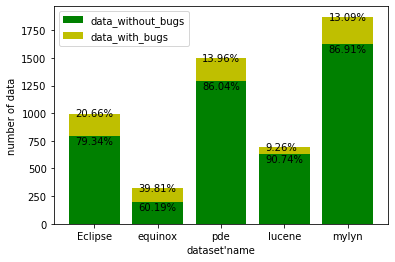

In [8]:

import matplotlib.pyplot as plt
num_list = [791,195,1288,627,1627]
num_list1 = [206,129,209,64,245]

def data_distribution(num_list,num_list1,name):
    name_list = ['Eclipse','equinox','pde','lucene','mylyn']
    num_list = num_list
    num_list1 = num_list1
    plt.bar(range(len(num_list)), num_list, label='data_without_bugs',fc = 'g')
    plt.bar(range(len(num_list)), num_list1, bottom=num_list, label='data_with_bugs',tick_label = name_list,fc = 'y')
    plt.xlabel("dataset'name")
    plt.ylabel("number of data")
    plt.legend()


    x = np.arange(len(name_list))
    y = np.array(num_list)
    y1 = np.array(num_list1)
    sum1 = y+y1
    for a,b in zip(x,y):
        print(a,b)
        plt.text(a-0.3,b, f'{b*100/sum1[a]:.2f}%',va = 'top')

    for a,b in zip(x,y1):
        print(a,b)
        plt.text(a-0.3,b+y[a], f'{b*100/sum1[a]:.2f}%',va = 'center')
    plt.savefig(name)
    plt.show()
data_distribution([791,195,1288,627,1627],[206,129,209,64,245],'five_dataset.png')

Y_train_bugs_eclipse:[(False, 791), (True, 791)]
Y_train_bugs_eclipse:[(False, 195), (True, 195)]
Y_train_bugs_eclipse:[(False, 1288), (True, 1288)]
Y_train_bugs_eclipse:[(False, 627), (True, 627)]
Y_train_bugs_eclipse:[(False, 1617), (True, 1617)]
0 791
1 195
2 1288
3 627
4 1617
0 791
1 195
2 1288
3 627
4 1617


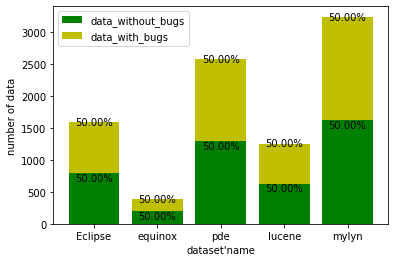

In [9]:
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_eclipse).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_equinox).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_pde).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_lucene).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_mylyn).items())}')
data_distribution([791,195,1288,627,1617],[791,195,1288,627,1617],"five_oversample_dataset")

In [10]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled_eclipse, y_resampled_eclipse = smote_enn.fit_resample(X_train_eclipse, Y_train_bugs_eclipse)
X_resampled_equinox, y_resampled_equinox = smote_enn.fit_resample(X_train_equinox, Y_train_bugs_equinox)
X_resampled_pde, y_resampled_pde = smote_enn.fit_resample(X_train_pde, Y_train_bugs_pde)
X_resampled_lucene, y_resampled_lucene = smote_enn.fit_resample(X_train_lucene, Y_train_bugs_lucene)
X_resampled_mylyn, y_resampled_mylyn = smote_enn.fit_resample(X_train_mylyn, Y_train_bugs_mylyn)
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_eclipse).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_equinox).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_pde).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_lucene).items())}')
print(f'Y_train_bugs_eclipse:{sorted(Counter(y_resampled_mylyn).items())}')

Y_train_bugs_eclipse:[(False, 543), (True, 682)]
Y_train_bugs_eclipse:[(False, 106), (True, 111)]
Y_train_bugs_eclipse:[(False, 767), (True, 1167)]
Y_train_bugs_eclipse:[(False, 448), (True, 574)]
Y_train_bugs_eclipse:[(False, 1069), (True, 1471)]


0 556
1 98
2 761
3 440
4 1080
0 673
1 117
2 1178
3 583
4 1498


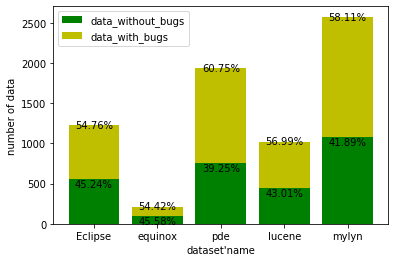

In [11]:
data_distribution([556,98,761,440,1080],[673,117,1178,583,1498],"five_Synsample_dataset")

In [12]:
sum1

NameError: name 'sum1' is not defined

In [13]:
X_eclipse1,Y_bugs_eclipse1 = MLSE.classification_binary2("modified_eclipse-metrics-files-2.0.csv",
                                                                     'ACD',"NORM_InstanceofExpression",0,
                                                                       "post")
X_eclipse2,Y_bugs_eclipse2 = MLSE.classification_binary2("modified_eclipse-metrics-files-2.1.csv",
                                                                     'ACD',"NORM_InstanceofExpression",0,
                                                                       "post")
X_eclipse3,Y_bugs_eclipse3 = MLSE.classification_binary2("modified_eclipse-metrics-files-3.0.csv",
                                                                     'ACD',"NORM_InstanceofExpression",0,
                                                                       "post")

AlltheMatrix/modified_eclipse-metrics-files-2.0.csv
lens: 203
start:5,end:181
(6729,)
the data shape is (6729, 175)
AlltheMatrix/modified_eclipse-metrics-files-2.1.csv
lens: 203
start:5,end:181
(7888,)
the data shape is (7888, 175)
AlltheMatrix/modified_eclipse-metrics-files-3.0.csv
lens: 203
start:5,end:181
(10593,)
the data shape is (10593, 175)


In [14]:
print(f'Y_train_eclipse1:{sorted(Counter(Y_bugs_eclipse1).items())}')
print(f'Y_train_eclipse2:{sorted(Counter(Y_bugs_eclipse2).items())}')
print(f'Y_train_eclipse3:{sorted(Counter(Y_bugs_eclipse3).items())}')

Y_train_eclipse1:[(False, 5754), (True, 975)]
Y_train_eclipse2:[(False, 7034), (True, 854)]
Y_train_eclipse3:[(False, 9025), (True, 1568)]


0 5754
1 7034
2 9025
0 975
1 854
2 1568


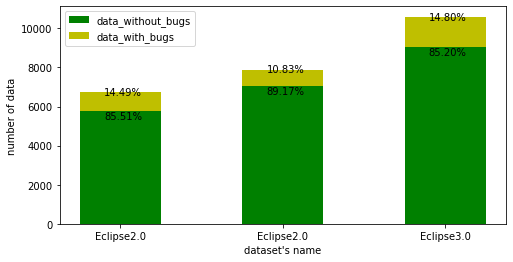

In [15]:
name_list = ['Eclipse2.0','Eclipse2.0','Eclipse3.0']
num_list = [5754,7034,9025]
num_list1 = [975,854,1568]
plt.figure(figsize = (8,4))
plt.bar(range(len(num_list)), num_list,width=0.5, label='data_without_bugs',fc = 'g')
plt.bar(range(len(num_list)), num_list1,width=0.5, bottom=num_list, label='data_with_bugs',tick_label = name_list,fc = 'y')
plt.xlabel("dataset's name")
plt.ylabel("number of data")
plt.legend()


x = np.arange(len(name_list))
y = np.array(num_list)
y1 = np.array(num_list1)
sum1 = y+y1
for a,b in zip(x,y):
    print(a,b)
    plt.text(a-0.1,b, f'{b*100/sum1[a]:.2f}%',va = 'top')
    
for a,b in zip(x,y1):
    print(a,b)
    plt.text(a-0.1,b+y[a], f'{b*100/sum1[a]:.2f}%',va = 'center')
plt.savefig('Eclipse_dataset.png')
plt.show()

In [16]:
import pandas
df = pandas.read_excel('algorithms_result.xlsx')


In [17]:
al_names = df['method'].values
al_accuracy = df['accuracy'].values
al_recall = df['recall'].values
al_precision = df['precision'].values
al_f1 = df['f1'].values

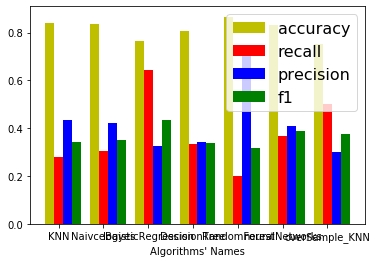

In [18]:
def sub_figure_plot(a,b): 
    
    name_list = al_names[a:b]
    num_list1 = al_accuracy[a:b]
    num_list2 = al_recall[a:b]
    num_list3 = al_precision[a:b]
    num_list4 = al_f1[a:b]
    x =list(range(len(name_list)))
    total_width, n = 0.8, 4
    width = total_width / n
    
    plt.bar(x, num_list1, width=width, label='accuracy',fc = 'y')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x, num_list2, width=width, label='recall',tick_label = name_list,fc = 'r')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x, num_list3, width=width, label='precision',fc = 'b')
    for i in range(len(x)):
        x[i] = x[i] + width
    plt.bar(x, num_list4, width=width, label='f1',fc = 'g')
    plt.legend(loc = 1,prop={'size':16})
    plt.xlabel("Algorithms' Names")
    
sub_figure_plot(0,7)

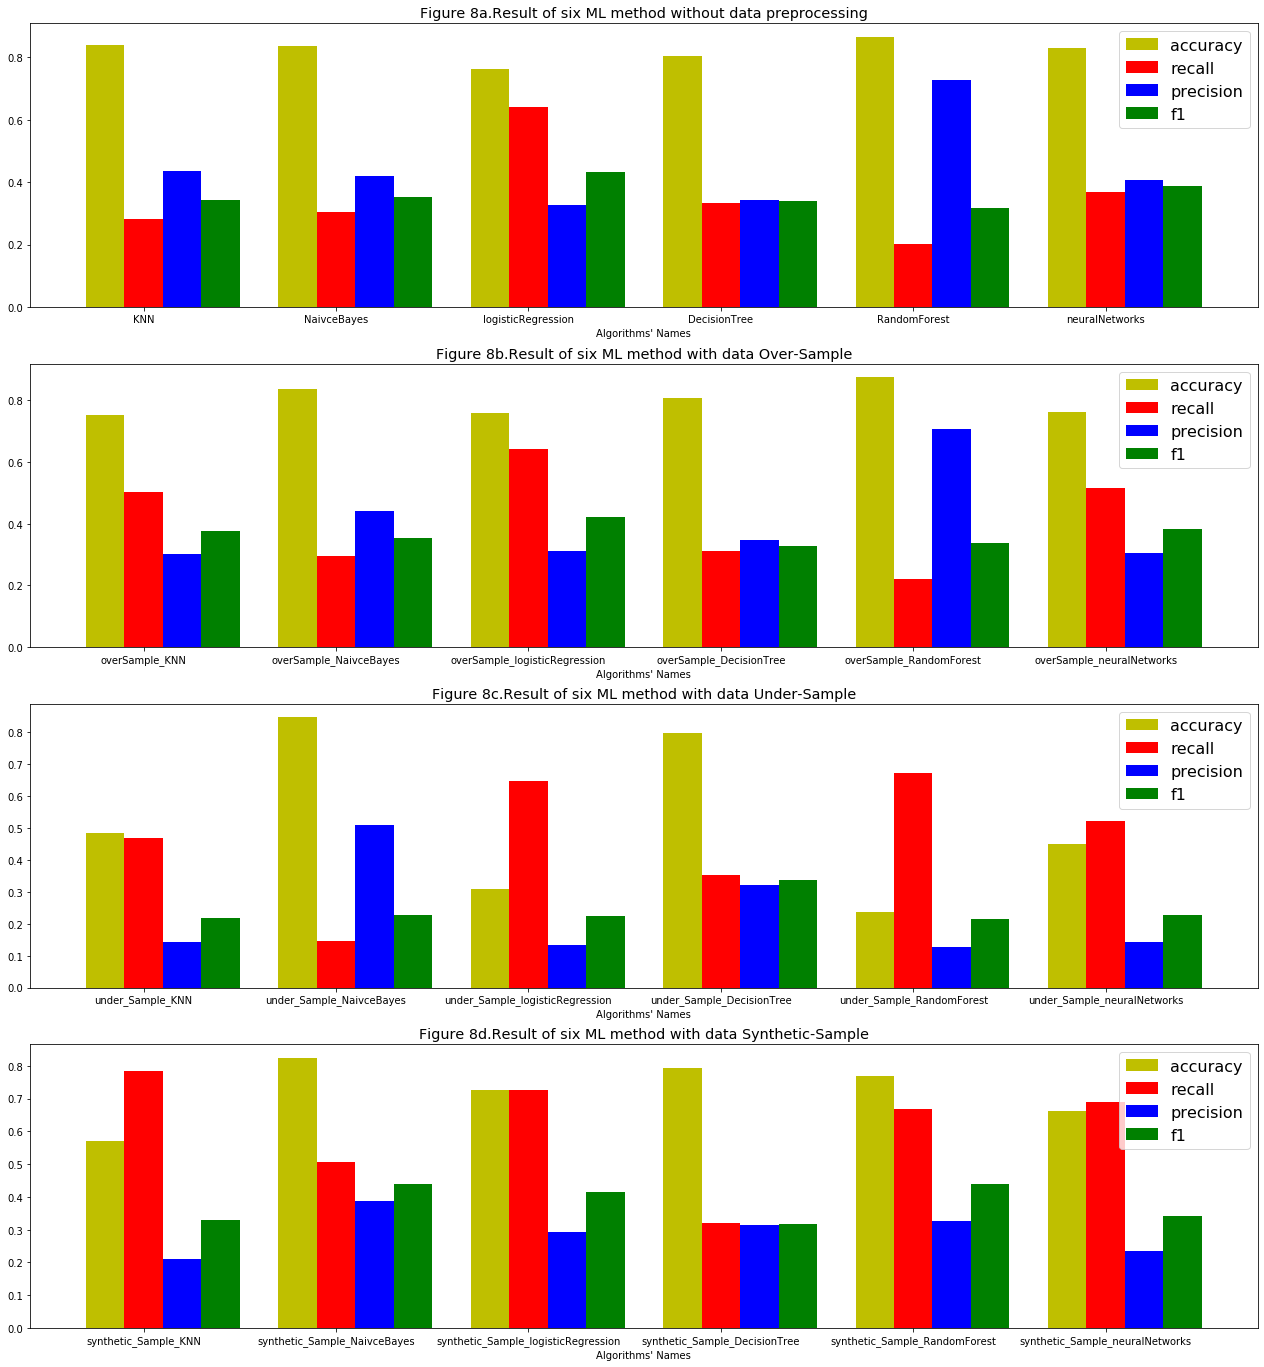

In [39]:
plt.figure(figsize = (22,24))
plt.subplot(4,1,1)
sub_figure_plot(0,6)
plt.title('Figure 8a.Result of six ML method without data preprocessing',fontsize = 'x-large')
plt.subplot(4,1,2)
sub_figure_plot(6,12)
plt.title('Figure 8b.Result of six ML method with data Over-Sample',fontsize = 'x-large')
plt.subplot(4,1,3)
sub_figure_plot(12,18)
plt.title('Figure 8c.Result of six ML method with data Under-Sample',fontsize = 'x-large')
plt.subplot(4,1,4)
sub_figure_plot(18,24)
plt.title('Figure 8d.Result of six ML method with data Synthetic-Sample',fontsize = 'x-large')
plt.savefig('different_algorithms_within_dataset.png',bbox_inches='tight',dpi=100,pad_inches=0.0)

In [20]:
al_names[0:7]

array(['KNN', 'NaivceBayes', 'logisticRegression', 'DecisionTree',
       'RandomForest', 'neuralNetworks', 'overSample_KNN'], dtype=object)